In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

22/01/24 10:55:35 WARN Utils: Your hostname, pavanlinux resolves to a loopback address: 127.0.0.1; using 10.0.2.15 instead (on interface enp0s3)
22/01/24 10:55:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/01/24 10:55:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
import numpy as np
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns
from pyspark.ml.feature import VectorAssembler

In [3]:
df = spark.read.csv("file:///home/pavan-linux/MLib/Linear Regression/Salary_Data.csv",inferSchema=True,header=True)

In [4]:
df.show(5)

+---------------+----+------+
|YearsExperience| Age|Salary|
+---------------+----+------+
|            1.1|21.0| 39343|
|            1.3|21.5| 46205|
|            1.5|21.7| 37731|
|            2.0|22.0| 43525|
|            2.2|22.2| 39891|
+---------------+----+------+
only showing top 5 rows



In [5]:
feature = VectorAssembler(inputCols=['YearsExperience','Age'],outputCol='features')

In [6]:
final_data  = feature.transform(df)

In [7]:
final_data = final_data.select('features','Salary')

In [8]:
final_data.show(5)

+----------+------+
|  features|Salary|
+----------+------+
|[1.1,21.0]| 39343|
|[1.3,21.5]| 46205|
|[1.5,21.7]| 37731|
|[2.0,22.0]| 43525|
|[2.2,22.2]| 39891|
+----------+------+
only showing top 5 rows



In [9]:
train,test = final_data.randomSplit([0.8,0.3])

In [10]:
from pyspark.ml.regression import LinearRegression

In [ ]:
regressor = LinearRegression(featuresCol = 'features', labelCol = 'Salary')
regressor = regressor.fit(train)

In [12]:
predictions = regressor.transform(test)
predictions.show(10)

+-----------+------+------------------+
|   features|Salary|        prediction|
+-----------+------+------------------+
| [2.2,22.2]| 39891| 48381.45540688647|
| [3.2,23.3]| 54445| 55808.23026938543|
| [4.0,24.0]| 56957| 61137.85532402675|
| [6.0,29.0]| 93940| 85508.21359903527|
| [6.8,30.0]| 91738| 91857.49671260631|
| [7.1,30.0]| 98273| 92963.90530653331|
| [9.6,36.0]|112635|122577.13810118588|
|[10.3,37.0]|122391|128557.61835011459|
|[10.5,38.0]|121872| 132694.0842758316|
+-----------+------+------------------+



In [13]:
regressor.coefficients

DenseVector([3688.0286, 3398.8602])

In [14]:
regressor.intercept

-35186.903976043424

In [15]:
nnn = predictions.toPandas()

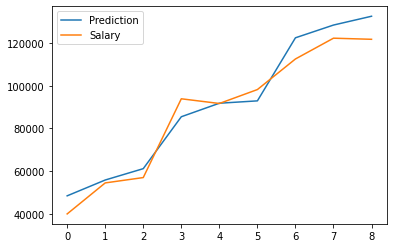

In [16]:
plt.plot(nnn['prediction'])
plt.plot(nnn['Salary'])
plt.legend(['Prediction','Salary'])

In [17]:
results = regressor.evaluate(test)

In [18]:
results.rootMeanSquaredError

7029.40149843954

In [19]:
print("Root Mean Squared Error (RMSE) on test data = %g" % results.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 7029.4
